In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

In [2]:
#Get all files CSV
path = r'C:/Users/Youcode/Desktop/Scraping github/data'
all_files = glob.glob(os.path.join(path, "n_repos_*.csv"))

df = pd.concat([pd.read_csv(f) for f in all_files])

#get information about dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 171396 entries, 0 to 20395
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Unnamed: 0        171396 non-null  int64 
 1   full_name         171396 non-null  object
 2   url               171396 non-null  object
 3   clone_url         171396 non-null  object
 4   watchers_count    171396 non-null  int64 
 5   stargazers_count  171396 non-null  int64 
 6   language          145800 non-null  object
 7   forks             171396 non-null  int64 
 8   description       117781 non-null  object
 9   type              171396 non-null  object
 10  license           72197 non-null   object
 11  fork              171396 non-null  bool  
 12  created_at        171396 non-null  object
 13  updated_at        171396 non-null  object
 14  pushed_at         171396 non-null  object
dtypes: bool(1), int64(4), object(10)
memory usage: 19.8+ MB


In [3]:
df.describe()

,Unnamed: 0,watchers_count,stargazers_count,forks
count,171396.000000,171396.000000,171396.000000,171396.000000
mean,14536.002649,30.975647,30.975647,4.932758
std,8614.407770,565.045435,565.045435,128.739006
min,0.000000,0.000000,0.000000,0.000000
25%,7141.000000,3.000000,3.000000,0.000000
50%,14282.500000,5.000000,5.000000,0.000000
75%,21630.000000,9.000000,9.000000,2.000000
max,30999.000000,140741.000000,140741.000000,31198.000000


In [4]:
#get names of columns
df.columns

Index(['Unnamed: 0', 'full_name', 'url', 'clone_url', 'watchers_count',
       'stargazers_count', 'language', 'forks', 'description', 'type',
       'license', 'fork', 'created_at', 'updated_at', 'pushed_at'],
      dtype='object')

In [5]:
#Delete culimn unnamed
del df['Unnamed: 0']

In [6]:
df.shape

(171396, 14)

In [7]:
#get sum of value null by column
df.isnull().sum()

full_name               0
url                     0
clone_url               0
watchers_count          0
stargazers_count        0
language            25596
forks                   0
description         53615
type                    0
license             99199
fork                    0
created_at              0
updated_at              0
pushed_at               0
dtype: int64

<h3>Language<h3>

In [8]:
#Drop all row if language column is null

df.dropna(subset=['language'],inplace=True)

<h3>Description</h3>

In [9]:
#Replace all description null

df['description'].fillna('No Description', inplace=True)

In [36]:
#!pip install emoji
#!pip install googletrans==3.1.0a0

In [113]:
#import emoji
import re

#Replace all description content just emoji

def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001fae5"
                           u"\U0001fae3"
                           u"\U0001fae2"
                           u"\U0001fae0"
                           u"\U0001fad9"
                           u"\U0001fabf"
                           u"\U0001fabc"
                           u"\U0001fab7"u"\U0001faaa"u"\U0001faa9"
                           u"🫖"u"🪨"
                           u"🫀"
                           u"🫒"
                           u"🫐"
                           u"🪶"u"🪵""🪴"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)


In [114]:
#Clean description : Delete imojis

df['description'] = df['description'].apply(remove_emoji)

<ul><li>Translate description</li></ul>

In [26]:
#pip install retry

In [115]:
#Translate Description to English
#import retry

import time
from googletrans import Translator
from httpx import Timeout
translator = Translator(timeout=Timeout())

#@retry.retry(tries=3,delay=2)
sumChars = 0
def translate_desc(text):
    global sumChars
    if(text != 'No Description'):
        sumChars += len(text)
        print(sumChars,'index : ',df[df['description'] == text].index)
        if(sumChars in range(100000,100500)):
            sumChars = 0
            time.sleep(65)
        else:
            try:
                if(translator.detect(text=text).lang == 'en'):
                    return text
                else:
                    return translator.translate(text).text
            except:
                return text
    else:
        return text
    


In [116]:
#Translate all description
df['description'] = df['description'].apply(translate_desc)

30 index :  Int64Index([0], dtype='int64')
305 index :  Int64Index([2], dtype='int64')
615 index :  Int64Index([3], dtype='int64')
754 index :  Int64Index([5], dtype='int64')
852 index :  Int64Index([6], dtype='int64')
895 index :  Int64Index([7], dtype='int64')
931 index :  Int64Index([8], dtype='int64')
981 index :  Int64Index([9], dtype='int64')
1016 index :  Int64Index([10], dtype='int64')
1118 index :  Int64Index([11], dtype='int64')
1130 index :  Int64Index([12], dtype='int64')
1165 index :  Int64Index([13], dtype='int64')
1231 index :  Int64Index([14], dtype='int64')
1286 index :  Int64Index([15], dtype='int64')
1338 index :  Int64Index([16], dtype='int64')
1489 index :  Int64Index([17], dtype='int64')
1547 index :  Int64Index([18], dtype='int64')
1592 index :  Int64Index([19], dtype='int64')
1627 index :  Int64Index([20], dtype='int64')
1627 index :  Int64Index([   23,   271,   399,   551,   720,  1007,  1140,  1281,  1308,
             1766,
            ...
            15828, 

34116 index :  Int64Index([5176], dtype='int64')
34207 index :  Int64Index([5177], dtype='int64')
34207 index :  Int64Index([   23,   271,   399,   551,   720,  1007,  1140,  1281,  1308,
             1766,
            ...
            15828, 16127, 16525, 17049, 17224, 17346, 17548, 17602, 17683,
            19455],
           dtype='int64', length=1264)
34256 index :  Int64Index([5180], dtype='int64')
34271 index :  Int64Index([5181], dtype='int64')
34341 index :  Int64Index([5184], dtype='int64')
34386 index :  Int64Index([5186], dtype='int64')
34443 index :  Int64Index([5187], dtype='int64')
34475 index :  Int64Index([5188], dtype='int64')
34762 index :  Int64Index([5189], dtype='int64')
34950 index :  Int64Index([5192], dtype='int64')
34972 index :  Int64Index([5193], dtype='int64')
35000 index :  Int64Index([5197], dtype='int64')
35044 index :  Int64Index([5198], dtype='int64')
35044 index :  Int64Index([   23,   271,   399,   551,   720,  1007,  1140,  1281,  1308,
             1

In [82]:
df.shape

(145800, 14)

<h3>License<h3>

In [43]:
#Replace all license null

df['license'].fillna('No License',inplace=True)

In [44]:
#calculat sum of duplicated rows

df.duplicated().sum()

847

In [45]:
df.drop_duplicates(inplace=True)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144953 entries, 0 to 20394
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   full_name         144953 non-null  object
 1   url               144953 non-null  object
 2   clone_url         144953 non-null  object
 3   watchers_count    144953 non-null  int64 
 4   stargazers_count  144953 non-null  int64 
 5   language          144953 non-null  object
 6   forks             144953 non-null  int64 
 7   description       144953 non-null  object
 8   type              144953 non-null  object
 9   license           144953 non-null  object
 10  fork              144953 non-null  bool  
 11  created_at        144953 non-null  object
 12  updated_at        144953 non-null  object
 13  pushed_at         144953 non-null  object
dtypes: bool(1), int64(3), object(10)
memory usage: 15.6+ MB


In [20]:
#Creat two indexs for culumns type numeric and categories
num_repositories_columns = df.select_dtypes(include=['int64','float64']).columns
cat_repositories_columns = df.select_dtypes(include='object').columns

In [21]:
#!pip install scikit-learn
from sklearn.preprocessing import LabelEncoder
scale = LabelEncoder()

In [22]:
#convert columns datatype category to data type numeric
for i in num_repositories_columns:
    df[i] = scale.fit_transform(df[i])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144953 entries, 0 to 20394
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   full_name         144953 non-null  object
 1   url               144953 non-null  object
 2   clone_url         144953 non-null  object
 3   watchers_count    144953 non-null  int64 
 4   stargazers_count  144953 non-null  int64 
 5   language          144953 non-null  object
 6   forks             144953 non-null  int64 
 7   description       144953 non-null  object
 8   type              144953 non-null  object
 9   license           66033 non-null   object
 10  fork              144953 non-null  bool  
 11  created_at        144953 non-null  object
 12  updated_at        144953 non-null  object
 13  pushed_at         144953 non-null  object
dtypes: bool(1), int64(3), object(10)
memory usage: 15.6+ MB


In [47]:
#Convert datetime to date
df['created_at'] = pd.to_datetime(df['created_at']).dt.date
df['updated_at'] = pd.to_datetime(df['created_at']).dt.date
df['pushed_at'] = pd.to_datetime(df['created_at']).dt.date

df.head().sort_values('forks',ascending=False)

,full_name,url,clone_url,watchers_count,stargazers_count,language,forks,description,type,license,fork,created_at,updated_at,pushed_at
3,LondheShubham153/90DaysOfDevOps,https://github.com/LondheShubham153/90DaysOfDe...,https://github.com/LondheShubham153/90DaysOfDe...,343,343,Python,2194,This repository is a Challenge for the DevOps ...,User,"{'key': 'other', 'name': 'Other', 'spdx_id': '...",False,2023-01-01,2023-01-01,2023-01-01
2,rupali-codes/LinksHub,https://github.com/rupali-codes/LinksHub,https://github.com/rupali-codes/LinksHub.git,348,348,TypeScript,283,LinksHub aims to provide developers with acces...,User,"{'key': 'mit', 'name': 'MIT License', 'spdx_id...",False,2023-01-01,2023-01-01,2023-01-01
0,sumn2u/learn-javascript,https://github.com/sumn2u/learn-javascript,https://github.com/sumn2u/learn-javascript.git,626,626,HTML,31,A book that teaches JavaScript,User,"{'key': 'apache-2.0', 'name': 'Apache License ...",False,2023-01-01,2023-01-01,2023-01-01
6,yacineMTB/scribepod,https://github.com/yacineMTB/scribepod,https://github.com/yacineMTB/scribepod.git,147,147,Jupyter Notebook,14,Some of the scripts I use for scribepod @ http...,User,No License,False,2023-01-01,2023-01-01,2023-01-01
5,702573N/Obsidian-Tasks-Timeline,https://github.com/702573N/Obsidian-Tasks-Time...,https://github.com/702573N/Obsidian-Tasks-Time...,165,165,JavaScript,13,A custom view build with Obsidian-Dataview to ...,User,No License,False,2023-01-01,2023-01-01,2023-01-01


In [52]:
#Calculat outlier of watchers|forks

w_Q1=df['watchers_count'].quantile(0.25)
w_Q3=df['watchers_count'].quantile(0.75)

w_IQR=w_Q3-w_Q1

w_Lower_Whisker = w_Q1 - 1.5 * w_IQR
w_Upper_Whisker = w_Q3 + 1.5 * w_IQR

f_Q1=df['forks'].quantile(0.25)
f_Q3=df['forks'].quantile(0.75)

f_IQR=f_Q3-f_Q1

f_Lower_Whisker = f_Q1 - 1.5 * f_IQR
f_Upper_Whisker = f_Q3 + 1.5 * f_IQR

print(w_Lower_Whisker,f_Lower_Whisker,f_Upper_Whisker, w_Upper_Whisker)

-7.5 -3.0 5.0 20.5


In [53]:
print(len(df.loc[df['watchers_count'] < w_Lower_Whisker]),len(df.loc[df['watchers_count'] > w_Upper_Whisker]))

0 17637


In [54]:
#separation outliers in other dataframe

watchers_outliers_df = df.loc[(df['watchers_count'] < w_Lower_Whisker) | (df['watchers_count'] > w_Upper_Whisker)]

forks_outliers_df = df.loc[(df['forks'] < f_Lower_Whisker) | (df['forks'] > f_Upper_Whisker)]

display(df['language'].value_counts(),watchers_outliers_df['language'].value_counts())


Python         29812
JavaScript     21674
TypeScript     15225
HTML            8354
Java            7067
               ...  
Pod                1
HyPhy              1
XS                 1
CWeb               1
Classic ASP        1
Name: language, Length: 315, dtype: int64

Python        5222
TypeScript    2163
JavaScript    1583
Go             833
C++            785
              ... 
mcfunction       1
Fortran          1
Groovy           1
Max              1
sed              1
Name: language, Length: 159, dtype: int64

In [55]:
#Create two file csv for insert all values without : watchers | forks
df.loc[(df['watchers_count'] > w_Lower_Whisker) & (df['watchers_count'] < w_Upper_Whisker)].to_csv('data/data_cleaned/data_without_watchers_outliers.csv')
df.loc[(df['forks'] > f_Lower_Whisker) & (df['forks'] < f_Upper_Whisker)].to_csv('data/data_cleaned/data_without_forks_outliers.csv')

In [56]:
#Create two file csv for insert all values outliers : watchers | forks
df.loc[(df['watchers_count'] < w_Lower_Whisker) & (df['watchers_count'] > w_Upper_Whisker)].to_csv('data/data_cleaned/watchers_outliers.csv')
df.loc[(df['forks'] < f_Lower_Whisker) & (df['forks'] > f_Upper_Whisker)].to_csv('data/data_cleaned/forks_outliers.csv')

In [57]:
#Read data without watchers | forks ouliers
df_without_watchers = pd.read_csv('data/data_cleaned/data_without_watchers_outliers.csv')
df_without_forks = pd.read_csv('data/data_cleaned/data_without_forks_outliers.csv')


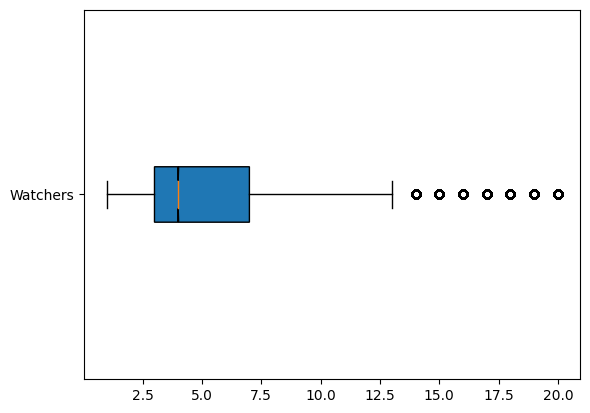

In [58]:
w_boxblot = plt.boxplot(
    df_without_watchers['watchers_count'],
    notch=True,  # notch shape
    vert=False,  # vertical box alignment
    patch_artist=True,  # fill with color
    labels=['Watchers']
)

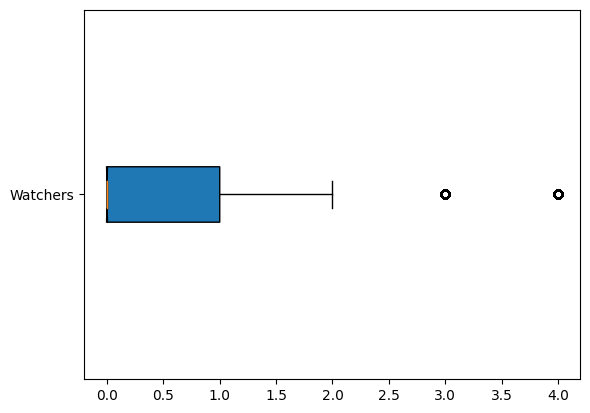

In [59]:

w_boxblot = plt.boxplot(
    df_without_forks['forks'],
    notch=True,  # notch shape
    vert=False,  # vertical box alignment
    patch_artist=True,  # fill with color
    labels=['Watchers']
)

0

<h2>Trending repositories :<h2>

In [125]:
#chargement dataframe : trending repo
df_trending = pd.read_csv('trending_2023_06_16.csv',index_col=0)
df_languages_trending = pd.read_csv('languages_trending_2023_06_16.csv',index_col=0)

In [126]:
df_trending.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   25 non-null     object
 1   link    25 non-null     object
 2   stars   25 non-null     object
 3   forks   25 non-null     object
dtypes: object(4)
memory usage: 1000.0+ bytes


In [127]:
#get name of columns for normalizing
cat_trending_columns = df_trending.loc[:,['forks','stars']].columns
cat_trending_columns

Index(['forks', 'stars'], dtype='object')

In [128]:
#loop for normalize columns of type Object to Int
for i in cat_trending_columns:
    df_trending[i] = scale.fit_transform(df_trending[i])

In [129]:
df_trending.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   25 non-null     object
 1   link    25 non-null     object
 2   stars   25 non-null     int32 
 3   forks   25 non-null     int32 
dtypes: int32(2), object(2)
memory usage: 800.0+ bytes


In [131]:
df_trending.isna().sum()

label    0
link     0
stars    0
forks    0
dtype: int64

In [130]:
df_trending.duplicated().sum()

0

In [124]:
df_languages_trending.info()

<class 'pandas.core.frame.DataFrame'>
Index: 126 entries, 0 to 125
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         126 non-null    object
 1   lang_name  126 non-null    object
 2   lines      126 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.9+ KB


In [7]:
df_trending.describe()

,label,link,stars,forks
count,25,25,25,25
unique,25,25,25,25
top,StanGirard/quivr,https://github.com/StanGirard/quivr,"7,694",963
freq,1,1,1,1


In [370]:
df_trending.isna().sum()

label    0
link     0
stars    0
forks    0
dtype: int64

In [368]:
df_languages_trending.isna().sum()

id           0
lang_name    0
lines        0
dtype: int64

In [371]:

#df_languages_trending.groupby(['id'])['lang_name'].apply(lambda x : x)

df_languages_trending

,id,lang_name,lines
0,StanGirard/quivr,TypeScript,108271
1,StanGirard/quivr,Python,85923
2,StanGirard/quivr,JavaScript,6319
3,StanGirard/quivr,PLpgSQL,4072
4,StanGirard/quivr,Dockerfile,1626
...,...,...,...
121,ordinals/ord,CSS,8662
122,ordinals/ord,Just,4842
123,ordinals/ord,JavaScript,1446
124,ordinals/ord,Python,1124
